# 1 Build a dataloader

In [7]:
import torch
import seaborn as sns
import sys
import numpy as np
from pathlib import Path
from scipy.io import arff
sys.path.insert(0, "..")

In [8]:
from src.data import make_dataset
#from src.models import imagemodels
#from src.models import train_model
import gin


Get EEG data

In [9]:
data = make_dataset.get_eeg()

2022-06-07 10:54:08.372 | INFO     | src.data.make_dataset:get_eeg:38 - Data is downloaded to /tmp/.keras/datasets/eeg.


tuple of description and Description

In [10]:
len(data), type(data)

TypeError: object of type 'PosixPath' has no len()

In [106]:
data[1]

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

HOw many observations?

In [109]:
len(data[0])

14980

In [110]:
data[0][0]

(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9, 4393.85, b'0')

In [111]:
labels = []
for x in data[0]:
    labels.append(int(x[14]))

In [112]:
np.array(labels).mean()

0.4487983978638184

Abount 45 % has the eyes closed. 

In [113]:
type(labels)

list

In [118]:
values = []
for x in data[0]:
    values.append(int(x[-14]))

In [11]:
from __future__ import annotations
from typing import Tuple
from tqdm import tqdm
import random
Tensor = torch.Tensor

In [21]:
from __future__ import annotations

import shutil
from pathlib import Path
from typing import List, Tuple

import tensorflow as tf
from scipy.io import arff
from src.data import data_tools




import gin
import numpy as np
import pandas as pd
import requests
import tensorflow as tf
import torch
from loguru import logger
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


Tensor = torch.Tensor

def get_eeg(data_dir: Path= "../../data/raw") -> Path:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff"  # noqa: E501
    datapath = tf.keras.utils.get_file(
        "eeg", origin=url, untar=False, cache_dir=data_dir
    )

    datapath = Path(datapath)
    logger.info(f"Data is downloaded to {datapath}.")
    
    
    return datapath



In [24]:

class BaseDataset:
    """The main responsibility of the Dataset class is to load the data from disk
    and to offer a __len__ method and a __getitem__ method
    """

    def __init__(self, datapath: Path) -> None:
        self.path = datapath
        self.data = self.process_data()

    def process_data(self) -> None:
        data = arff.loadarff(self.path)
        cur_label = int(data[0][0][14])
        EEG_list = []
        EEG_full = []
        for obs in data[0]:
            if int(obs[14]) == cur_label:
                EEG_dim = []
                for index, i in enumerate(obs):
                    if index != 14:
                        EEG_dim.append(i)
                EEG_dim = torch.tensor(EEG_dim)
                EEG_list.append(EEG_dim)
            else:
                EEG_list_label = (cur_label, torch.stack(EEG_list)) # stack zorgt ervoor dat de tensors bij elkaar komen 
                EEG_full.append(EEG_list_label)
                cur_label = int(obs[14])
                EEG_list = []
                EEG_dim = []
                for index, i in enumerate(obs):
                    if index != 14:
                         EEG_dim.append(i)
                EEG_dim = torch.tensor(EEG_dim)
            EEG_list_label = (cur_label, torch.stack(EEG_list))
            EEG_full.append(EEG_list_label)
            return EEG_full

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, idx: int) -> Tuple:
        return self.data[idx]





In [25]:
dataloader = BaseDataset(datapath=get_eeg())

2022-06-07 11:00:53.936 | INFO     | __main__:get_eeg:35 - Data is downloaded to /tmp/.keras/datasets/eeg.


In [26]:
dataloader.__len__()

1

x moet worden omgezet naar een torch tensor

In [84]:
import tensorflow as tf
con_lis = tf.convert_to_tensor(values)

In [52]:
type(con_lis)

tensorflow.python.framework.ops.EagerTensor

In [86]:
con_lis[0]

<tf.Tensor: shape=(), dtype=int32, numpy=4009>

In [91]:
labels = list(labels)

In [96]:
type(labels)

list

In [93]:
series = data['MonthlyMean']
tensordata = torch.from_numpy(series.to_numpy()).type(torch.float32)

TypeError: tuple indices must be integers or slices, not list

In [119]:

for index in enumerate(labels):
    if(index+1 < len(labels) and index -1 >=0):

        prev_el = str(labels[index-1])
        curr_el = str(index)
        curr_el == prev_el
        print(curr_el)




TypeError: can only concatenate tuple (not "int") to tuple

0.4487983978638184

In [121]:
data2 = list(data[0])

In [129]:
for index, labels in enumerate(data2):
    labels = []
    for x in data2[0]:
        labels.append(int(x[14]))
    if(index+1 < len(labels) and index -1 >=0):

        prev_el = str(labels[index-1])
        curr_el = str(index)
        curr_el == prev_el
        print(prev_el,curr_el)



IndexError: invalid index to scalar variable.

In [124]:

for labels, values in enumerate(data2):
    if(labels+1 < len(data2) and labels -1 >=0):

        prev_el = str(data2[labels-1])
        curr_el = str(labels)
        curr_el == prev_el
        print(prev_el,curr_el)




(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9, 4393.85, b'0') 1
(4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1, b'0') 2
(4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'0') 3
(4328.72, 4011.79, 4296.41, 4155.9, 4343.59, 4582.56, 4097.44, 4630.77, 4217.44, 4235.38, 4210.77, 4287.69, 4632.31, 4396.41, b'0') 4
(4326.15, 4011.79, 4292.31, 4151.28, 4347.69, 4586.67, 4095.9, 4627.69, 4210.77, 4244.1, 4212.82, 4288.21, 4632.82, 4398.46, b'0') 5
(4321.03, 4004.62, 4284.1, 4153.33, 4345.64, 4587.18, 4093.33, 4616.92, 4202.56, 4232.82, 4209.74, 4281.03, 4628.21, 4389.74, b'0') 6
(4319.49, 4001.03, 4280.51, 4151.79, 4343.59, 4584.62, 4089.74, 4615.9, 4212.31, 4226.67, 4201.03, 4269.74, 4625.13, 4378.46, b'0') 7
(4325.64, 4006.67, 4278.46, 4143.08, 4344.1, 4583.08, 4087.18,

In [25]:


for index, elem in enumerate(labels):
    if(index+1 < len(labels) and index-1 >=0):

        prev_el = str(labels[index-1])
        curr_el = str(elem)
        curr_el == prev_el
        


TypeError: count() takes at least 1 argument (0 given)

In [87]:
append

(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9, 4393.85, b'0')

In [78]:
a_list = [1,2,3,4,5]

for index, elem in enumerate(a_list):
    if (index+1 < len(a_list) and index - 1 >= 0):


        prev_el = str(a_list[index-1])
        curr_el = str(elem)
        next_el = str(a_list[index+1])

        print(prev_el, curr_el, next_el)

1 2 3
2 3 4
3 4 5


In [77]:
print(curr_el)

NameError: name 'curr_el' is not defined

In [74]:
data[0][0]

(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9, 4393.85, b'0')

In [34]:
print(prev_el)

NameError: name 'prev_el' is not defined

In [26]:

# if labels == labels:
#     return data[x]

# [[next(it) for _ in range(size)] for size in sizes]
x = []


for i in labels:
     if current == i:
     next(iter(values))
    
    def __next__(self) -> Tuple[Tensor, Tensor]:
        if self.labels == self.labels:
            values,labels = self.batchloop()  # noqa N806
            X_ = pad_sequence(X, batch_first=True, padding_value=0)  # noqa N806
            return X_, torch.tensor(Y)
        else:
            raise StopIteration


IndentationError: expected an indented block (4139496906.py, line 8)

In [4]:
sample_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
chunked_list = list()
chunk_size = 2
for i in range(0, len(sample_list), chunk_size):
    chunked_list.append(sample_list[i:i+chunk_size])
print(chunked_list)

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]


And, last, we need the `load_image` function.

While there are multiple libraries available to load images (`pyvips`, `PIL`) the functions from `tensorflow` are the fastest for the sequence of tasks:
- load image from disk
- decode into an array of numbers
- resize the image to a fixed size
- cast to `numpy` array

In [10]:
def load_image(
    path: Path, image_size: Tuple[int, int], channels: int
) -> np.ndarray:
    # load file
    img_ = tf.io.read_file(str(path))
    # decode as image
    img = tf.image.decode_image(img_, channels=channels)
    # resize with bilinear algorithm
    img_resize = tf.image.resize(img, image_size, method="bilinear")
    # add correct shape with channels-last convention
    img_resize.set_shape((image_size[0], image_size[1], channels))
    # cast to numpy
    return img_resize.numpy()

In [11]:
%timeit load_image(file, image_size=(180, 180), channels=3)

2.67 ms ± 42.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
file = next(paths)
img = load_image(file, (180, 180), 3)
type(img), img.shape

(numpy.ndarray, (180, 180, 3))

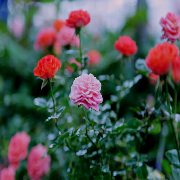

In [13]:
Image.fromarray(img.astype(np.uint8))

With this, we can construct our own data generator, using the design pattern we looked at in lesson 2.

- We gather all the paths to files
- We shuffle the index_list 
- For the range of `batchsize`, we use the `index_list[index]` design pattern to gather a random batch
- label name is extacted from the subfolder name

I implemented everything in the `src/data/data_tools.py` file, in a `Dataloader` class. Check out the file and study how I did that.

In [14]:
dataloader = data_tools.Dataloader(path=image_folder, split=0.8)

In [15]:
dataloader.class_names

['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']

In [16]:
datastream = dataloader.data_generator(
    batch_size = 32, 
    image_size = (150, 150),
    channels = 3,
    shuffle = True, 
    channel_first=False,
    mode="train"
)

We can time this, and it is fast enough, considering we have a batchsize of 32; I clocked 2.68ms for a single image, so that would give us about 86ms for just the loading of the 32 images from disk. Depending on things like my cpu temperature, I get around 98ms for a batch. The additional 22ms for resizing, decoding and casting to numpy for 32 images comes down to about 0.7ms per image.

In [17]:
%timeit next(datastream)

97.8 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The result:

In [19]:
X, y = next(datastream)
X.shape, y.shape

((32, 150, 150, 3), (32,))

Or, switching the channel to a channel_first mode:

In [20]:
datastream = dataloader.data_generator(
    batch_size = 32, 
    image_size = (150, 150),
    channels = 3,
    shuffle = True, 
    channel_first=True,
    mode="train"
)
X, y = next(datastream)
X.shape, y.shape

((32, 3, 150, 150), (32,))